<a href="https://colab.research.google.com/github/uyminhtri2702/AI/blob/main/Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount( '/content/gdrive' )

Mounted at /content/gdrive


In [187]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [164]:
train = '/content/gdrive/MyDrive/Colab Notebooks/10monanvn/test'
val_data = '/content/gdrive/MyDrive/Colab Notebooks/10monanvn/train'
data = tf.keras.preprocessing.image_dataset_from_directory(train)

Found 180 files belonging to 9 classes.


In [165]:
datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split = 0.2)

In [166]:
height = 228
width = 228
channels = 3
batch_size = 32
img_shape = (height, width, channels)
img_size = (height, width)

In [167]:
train_data = datagen.flow_from_directory(
    train,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

val_data = datagen.flow_from_directory(
    train,
    target_size = img_size,
    batch_size = batch_size,
    class_mode='categorical',
    subset = 'validation')

Found 145 images belonging to 9 classes.
Found 35 images belonging to 9 classes.


In [168]:
num_classes = len(data.class_names)
print('.... Number of Classes : {0} ....'.format(num_classes))

.... Number of Classes : 9 ....


In [169]:
def show_img(data):
    plt.figure(figsize=(15,15))
    for images, labels in data.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            ax.imshow(images[i].numpy().astype("uint8"))
            ax.axis("off")
def show_img(val):
    plt.figure(figsize=(15,15))
    for images, labels in val.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            ax.imshow(images[i].numpy().astype("uint8"))
            ax.axis("off")

In [170]:
# load pre-trained InceptionV3
pre_trained = InceptionV3(weights='imagenet', include_top=False, input_shape=img_shape, pooling='avg')

for layer in pre_trained.layers:
    layer.trainable = False

In [171]:
x = pre_trained.output
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs = pre_trained.input, outputs = predictions)
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [172]:
STEP_SIZE_TRAIN = train_data.n // train_data.batch_size
STEP_SIZE_VALID = val_data.n // val_data.batch_size

history = model.fit_generator(train_data,
                    steps_per_epoch = STEP_SIZE_TRAIN,
                    validation_data = val_data,
                    validation_steps = STEP_SIZE_VALID,
                    epochs = 20,
                    verbose = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/20
4/4 [==============================] - 43s 12s/step - loss: 1.1762 - accuracy: 0.6018 - val_loss: 1.1516 - val_accuracy: 0.6562
Epoch 2/20
4/4 [==============================] - 4s 960ms/step - loss: 0.2141 - accuracy: 0.9292 - val_loss: 1.2145 - val_accuracy: 0.6250
Epoch 3/20
4/4 [==============================] - 3s 924ms/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 1.7883 - val_accuracy: 0.6875
Epoch 4/20
4/4 [==============================] - 3s 902ms/step - loss: 0.0549 - accuracy: 0.9735 - val_loss: 1.5582 - val_accuracy: 0.7500
Epoch 5/20
4/4 [==============================] - 3s 940ms/step - loss: 0.1018 - accuracy: 0.9558 - val_loss: 1.4648 - val_accuracy: 0.7500
Epoch 6/20
4/4 [==============================] - 4s 965ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.8433 - val_accuracy: 0.8750
Epoch 7/20
4/4 [==============================] - 3s 942ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.0818 - val_accuracy: 0.8750
Epoch 8/20
4/4 [=====

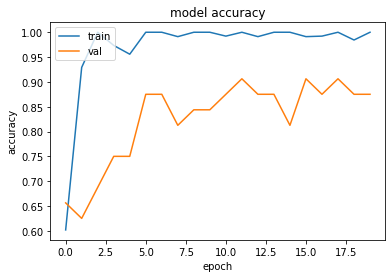

In [173]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [174]:
model.save('Food.h5')
from keras.models import load_model
Food=load_model('Food.h5')

In [175]:
score = model.evaluate(train_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  0.04078898951411247
Độ chính xác kiểm tra là:  0.9793103337287903


In [176]:
class_map = train_data.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)

In [203]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(228, 228))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img_array)

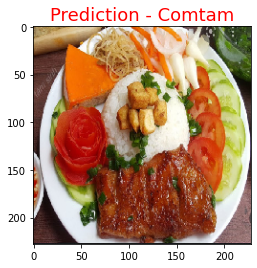

In [205]:
predict_image('/content/gdrive/MyDrive/Colab Notebooks/10monanvn/z3435284523637_86da89b75e7d4966f9cc0724bc21d9ba.jpg', model)